In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [12]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        # Initialize the biases
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

        # print(f'weights_input_hidden = {self.weights_input_hidden}')
        # print(f'weights_hidden_output = {self.weights_hidden_output}')
        # print(f'bias_hidden = {self.bias_hidden}')
        # print(f'bias_output = {self.bias_output}')
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        # Input to hidden
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        # Hidden to output
        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate):
        # Compute the output layer error
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        # Compute the hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss:{loss}")
        print(f"Epoch {epoch}, Loss:{loss}")

**Step 1: Load the Iris dataset**

In [13]:
iris = load_iris()
X = iris.data
y = iris.target

**Step 2: Preprocess the data**
One-hot encode the target labels

In [14]:
encoder = OneHotEncoder()
y_one_hot = encoder.fit_transform(y.reshape(-1, 1)).toarray()
print(y_one_hot[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


**Normalize the features**

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X[:5]);print(X_scaled[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


**Step 3: Split the data into training and testing sets**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.5, random_state=123)
print(X_train.shape);print(y_train.shape)

(75, 4)
(75, 3)


**Step 4: Initialize the neural network**

In [17]:
input_size = X_train.shape[1]
hidden_size = 4  # This can be tuned
output_size = y_train.shape[1]

nn = NeuralNetwork(input_size, hidden_size, output_size)


**Step 5: Train the neural network**

In [18]:
epochs = 1000  # Number of epochs
learning_rate = 0.01  # Learning rate
nn.train(X_train, y_train, epochs, learning_rate)

Epoch 0, Loss:0.2638174219779593
Epoch 100, Loss:0.12302448604841776
Epoch 200, Loss:0.10020550616574377
Epoch 300, Loss:0.08426085117767318
Epoch 400, Loss:0.06753779191307575
Epoch 500, Loss:0.05253499098704391
Epoch 600, Loss:0.041579389403682866
Epoch 700, Loss:0.034179834837384085
Epoch 800, Loss:0.029118479393231318
Epoch 900, Loss:0.02549973456729653
Epoch 999, Loss:0.02549973456729653


**Step 6: Evaluate the neural network**

In [20]:
predicted_output = nn.feedforward(X_test)
predicted_labels = np.argmax(predicted_output, axis=1)
true_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predicted_labels == true_labels)
print(f"Accuracy: {accuracy:%}")

Accuracy: 98.666667%


In [10]:
incorrect_predict = np.where(predicted_labels != true_labels)

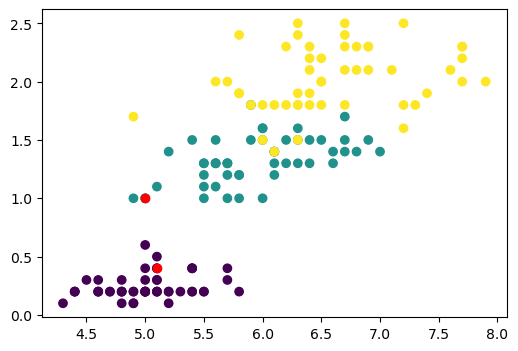

In [11]:
import matplotlib.pyplot as plt
feature1 = 0
feature2 = 3
plt.figure(figsize=(6, 4))
plt.scatter(X[:, feature1], X[:, feature2], c=y)
plt.scatter(X[incorrect_predict, feature1], X[incorrect_predict, feature2], color='red')